In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib as mpl
from matplotlib.lines import Line2D
from pathlib import Path
import os
import pickle


from openpyxl.styles.builtins import title
from torch.backends.cudnn import allow_tf32

plot_folder = Path('/Users/jg/Desktop/upper_limb/paper_figures-3')
os.makedirs(plot_folder, exist_ok=True)
data_folder = Path('/Users/jg/Desktop/upper_limb/paper_data-2')


In [127]:
participants = ['P_149', 'P_238', 'P_407', 'P_426', 'P_577', 'P_668', 'P_711', 'P_950', 'P7_453', 'P6_820']
online_participants = ['P_149', 'P_238', 'P_407', 'P_426', 'P_577', 'P_668', 'P_711', 'P_950', 'P7_453']
targets = ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
recordings = ['thumbFlEx', 'thumbAbAd', 'indexFlEx', 'mrpFlEx', 'fingersFlEx', 'wristFlEx', 'handOpCl', 'pinchOpCl', 'pointOpCl']
test_recordings = ['keyOpCl', 'wristFlHandCl', 'indexFlDigitsEx']

df = pd.DataFrame(index=participants, columns=pd.MultiIndex.from_product([['init', 'offline', 'comp', 'comp_interp', 'pert_init', 'pert_offline', 'pert_comp', 'pert_comp_interp'], ['val', 'test', 'total']]))
df.loc[:, 'participants'] = df.index



In [128]:
# deals with the shorter online recordings for 'P7_453', 'P6_820'
def deal_w_nan(data):
    complete = data.iloc[-1].dropna().index
    mask_nan = data.loc[:, complete].isna().any(axis=1)
    if mask_nan.any():
        data.fillna(method='ffill', inplace=True)
        data = data[~mask_nan]
    data = data.reset_index(drop=True)
    return data

In [129]:
# init
mapping = pd.read_csv(data_folder / 'offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'init')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'init'), inplace=True)

# val
data = pd.read_csv(data_folder / 'offline_val_loss.csv')
data = deal_w_nan(data)
    
for key in df.index:
    df.loc[key, ('init', 'val')] = data.loc[0, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'offline_test_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('init', 'test')] = data.loc[0, f'{key} - total_test_loss']
    
# total
df.loc[:, ('init', 'total')] = (df.loc[:, ('init', 'val')] * 9 + df.loc[:, ('init', 'test')] * 3) / 12

In [130]:
# offline
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'offline')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'offline'), inplace=True)

# val
data = pd.read_csv(data_folder / 'offline_val_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('offline', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'offline_test_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('offline', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('offline', 'total')] = (df.loc[:, ('offline', 'val')] * 9 + df.loc[:, ('offline', 'test')] * 3) / 12

In [131]:
# pert_init
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'pert_offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'pert_init')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'pert_init'), inplace=True)

In [132]:
# val
data = pd.read_csv(data_folder / 'pert_offline_val_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('pert_init', 'val')] = data.loc[0, f'{key} - total_val_loss']

# test
data = pd.read_csv(data_folder / 'pert_offline_test_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('pert_init', 'test')] = data.loc[0, f'{key} - total_test_loss']

# total
df.loc[:, ('pert_init', 'total')] = (df.loc[:, ('pert_init', 'val')] * 9 + df.loc[:, ('pert_init', 'test')] * 3) / 12

In [133]:
# pert_offline
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'pert_offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'pert_offline')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'pert_offline'), inplace=True)

# val
data = pd.read_csv(data_folder / 'pert_offline_val_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('pert_offline', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'pert_offline_test_loss.csv')
data = deal_w_nan(data)

    
for key in df.index:
    df.loc[key, ('pert_offline', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('pert_offline', 'total')] = (df.loc[:, ('pert_offline', 'val')] * 9 + df.loc[:, ('pert_offline', 'test')] * 3) / 12

In [134]:
# online
data = pd.read_csv(data_folder / 'online.csv')
data.set_index('Name', inplace=True)
df.set_index('participants', inplace=True, drop=False)
for participant in online_participants:
    df.loc[participant, ('online', 'val')] = data.loc[participant, 'last.total_val_loss']
    df.loc[participant, ('online', 'test')] = data.loc[participant, 'last.total_test_loss']
df.loc[:, ('online', 'total')] = (df.loc[:, ('online', 'val')] * 9 + df.loc[:, ('online', 'test')] * 3) / 12


In [135]:
# pert_online
data = pd.read_csv(data_folder / 'pert_online.csv')
data = deal_w_nan(data)
data.set_index('Name', inplace=True)
df.set_index('participants', inplace=True, drop=False)
for participant in online_participants:
    df.loc[participant, ('pert_online', 'val')] = data.loc[participant + '_perturb', 'last.total_val_loss']
    df.loc[participant, ('pert_online', 'test')] = data.loc[participant  + '_perturb', 'last.total_test_loss']
df.loc[:, ('pert_online', 'total')] = (df.loc[:, ('pert_online', 'val')] * 9 + df.loc[:, ('pert_online', 'test')] * 3) / 12

In [136]:
# comp
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'comp_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'comp')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'comp'), inplace=True)

# val
data = pd.read_csv(data_folder / 'comp_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('comp', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'comp_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('comp', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('comp', 'total')] = (df.loc[:, ('comp', 'val')] * 9 + df.loc[:, ('comp', 'test')] * 3) / 12

In [137]:
# pert_comp
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'pert_comp_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'pert_comp')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'pert_comp'), inplace=True)

# val
data = pd.read_csv(data_folder / 'pert_comp_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('pert_comp', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'pert_comp_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('pert_comp', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('pert_comp', 'total')] = (df.loc[:, ('pert_comp', 'val')] * 9 + df.loc[:, ('pert_comp', 'test')] * 3) / 12

In [138]:
# comp_interp
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'comp_interp_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'comp_interp')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'comp_interp'), inplace=True)

# val
data = pd.read_csv(data_folder / 'comp_interp_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('comp_interp', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'comp_interp_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('comp_interp', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('comp_interp', 'total')] = (df.loc[:, ('comp_interp', 'val')] * 9 + df.loc[:, ('comp_interp', 'test')] * 3) / 12

In [139]:
# pert_comp_interp
df.set_index('participants', inplace=True, drop=False)
mapping = pd.read_csv(data_folder / 'pert_comp_interp_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.MultiIndex.from_tuples([('run', 'pert_comp_interp')])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index(('run', 'pert_comp_interp'), inplace=True)

# val
data = pd.read_csv(data_folder / 'pert_comp_interp_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('pert_comp_interp', 'val')] = data.loc[len(data)-1, f'{key} - total_val_loss']
    
# test
data = pd.read_csv(data_folder / 'pert_comp_interp_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    df.loc[key, ('pert_comp_interp', 'test')] = data.loc[len(data)-1, f'{key} - total_test_loss']
    
# total
df.loc[:, ('pert_comp_interp', 'total')] = (df.loc[:, ('pert_comp_interp', 'val')] * 9 + df.loc[:, ('pert_comp_interp', 'test')] * 3) / 12

In [140]:
# calculate perturbation strength
df.set_index('participants', inplace=True, drop=False)

I = np.eye(8)
for participant in participants:
    pert_file = f'data/{participant}/online_trials/perturb/perturber.npy'
    perturbation_matrix = np.load(pert_file)
    df.loc[participant, ('pert', 'frobenius_norm')] = np.linalg.norm(perturbation_matrix - I, 'fro')
    df.loc[participant, ('pert', 'spectral_norm')] = np.linalg.norm(perturbation_matrix, 2)
    df.loc[participant, ('pert', 'determinant')]  = np.linalg.det(perturbation_matrix)

In [141]:
df.set_index('participants', inplace=True, drop=False)

df.to_parquet(data_folder / 'df_1.parquet')

In [142]:
# does the order matter?
# participants = ['P_149', 'P_238', 'P_407', 'P_426', 'P_577', 'P_668', 'P_711', 'P_950']
# data_folder = Path('/Users/jg/Desktop/upper_limb/paper_data')
#make df using the participants as index



df = pd.DataFrame(index=participants) #, columns=pd.MultiIndex.from_product([['init', 'offline'], ['val', 'test', 'total']]))
df.loc[:, 'participants'] = df.index


In [143]:
# offline
# df.set_index('participants', inplace=True, drop=False)
df.index.set_names('participants', inplace=True)
mapping = pd.read_csv(data_folder / 'offline_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.Index(['run'])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index('run', inplace=True)

# val
data = pd.read_csv(data_folder / 'offline_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_val_loss']
    
val_df = df.copy()

# test
data = pd.read_csv(data_folder / 'offline_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_test_loss']

test_df = df.copy()
test_df.drop(columns='participants', inplace=True)
val_df.drop(columns='participants', inplace=True)
# total
total_df = (val_df * 9 + test_df * 3) / 12
total_df_offline = total_df.copy()
val_df_offline = val_df.copy()
test_df_offline = test_df.copy()

In [144]:
df = pd.DataFrame(index=participants) #, columns=pd.MultiIndex.from_product([['init', 'offline'], ['val', 'test', 'total']]))
df.loc[:, 'participants'] = df.index

In [145]:
# inverse
# df.set_index('participants', inplace=True, drop=False)
df.index.set_names('participants', inplace=True)
mapping = pd.read_csv(data_folder / 'inverse_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.Index(['run'])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index('run', inplace=True)

# val
data = pd.read_csv(data_folder / 'inverse_val_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_val_loss']
    
val_df = df.copy()

# test
data = pd.read_csv(data_folder / 'inverse_test_loss.csv')
data = deal_w_nan(data)
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_test_loss']

test_df = df.copy()
test_df.drop(columns='participants', inplace=True)
val_df.drop(columns='participants', inplace=True)
# total
total_df = (val_df * 9 + test_df * 3) / 12
total_df_inverse = total_df.copy()
val_df_inverse = val_df.copy()
test_df_inverse = test_df.copy()


In [146]:
print(f'Old First: {total_df_inverse.mean(axis=0).iloc[-1]}')
print(f'New First: {total_df_offline.mean(axis=0).iloc[-1]}')

Old First: 0.07841022415862726
New First: 0.07743508482817557


In [147]:
# best
# df.set_index('participants', inplace=True, drop=False)
df = pd.DataFrame(index=participants) #, columns=pd.MultiIndex.from_product([['init', 'offline'], ['val', 'test', 'total']]))
df.loc[:, 'participants'] = df.index
df.index.set_names('participants', inplace=True)
mapping = pd.read_csv(data_folder / 'best_mapping.csv')
mapping.set_index('person_dir', inplace=True)
mapping.columns = pd.Index(['run'])
df = df.merge(mapping, left_index=True, right_index=True)
df.set_index('run', inplace=True)

# val
data = pd.read_csv(data_folder / 'best_val_loss.csv')
data = deal_w_nan(data)
    
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_val_loss']
    
val_df = df.copy()

# test
data = pd.read_csv(data_folder / 'best_test_loss.csv')
data = deal_w_nan(data)
    
for key in df.index:
    for i in data.index:
        df.loc[key, i] = data.loc[i, f'{key} - total_test_loss']

test_df = df.copy()
test_df.drop(columns='participants', inplace=True)
val_df.drop(columns='participants', inplace=True)
# total
total_df = (val_df * 9 + test_df * 3) / 12
total_df_best = total_df.copy()
val_df_best = val_df.copy()
test_df_best = test_df.copy()

In [148]:
df = pd.read_parquet(data_folder / 'df_1.parquet')

In [ ]:
#PLOT individual lines

# Create a figure and a set of subplots with independent y-axis limits
fig, axes = plt.subplots(1, 3, figsize=(9*0.7, 4*0.7), sharey=True)

# Set index
df.set_index('participants', inplace=True, drop=False)

# Modes to plot
modes = ['val', 'test', 'total']
names = ['Known Movements', 'New Movements', 'Combined']

# Plot each mode in a separate subplot
for idx, (ax, mode) in enumerate(zip(axes, modes)):
    for participant in participants:
        ax.plot(['Before', 'After'], 
                [df.loc[participant, ('init', mode)], df.loc[participant, ('offline', mode)]], 
                label=participant)
    name = 'Validation' if mode == 'val' else 'Test' if mode == 'test' else 'Total'
    ax.set_title(names[idx], fontweight='bold')
    
    # Set ylabel only for the first subplot
    if idx == 0:
        ax.set_ylabel('MSE')

    # Add legend only to the last subplot
    if idx == 2:  # Last subplot
        # ax.legend(loc='upper right', title='Participants', title_fontproperties={'weight':'bold'}, fontsize='x-small')
        ax.legend(loc='upper right', title='Participants', title_fontproperties={'weight':'bold'}, fontsize='x-small', ncol=2)

    ax.set_xlabel('Online Training')




# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.savefig(plot_folder / 'individualLines.png', dpi=600) 
plt.show()
plt.close(fig)

In [150]:
# # PLOT perturbation results only

# # Create a figure and a single set of axes
# fig, ax = plt.subplots(figsize=(10, 6))

# # Set index
# df.set_index('participants', inplace=True, drop=False)

# # Modes to plot
# modes = ['val', 'test', 'total']
# colors = ['blue', 'green', 'red']  # Different colors for each mode
# labels = ['Known Movements', 'New Movements', 'All Movements']  # Labels for each mode

# # X positions for 'before' and 'after'
# x_positions = np.arange(2)  # Positions for 'before' and 'after'
# bar_width = 0.02  # Used for shifting

# # Create a list to store custom legend handles
# custom_legend_handles = []
# custom_legend_handles2 = []


# # Plot each mode on the same axes
# for idx, (mode, color, label) in enumerate(zip(modes, colors, labels)):
#     # Extract data
#     means_before = []
#     means_after = []

#     for participant in participants:
#         means_before.append(df.loc[participant, ('pert_init', mode)])
#         means_after.append(df.loc[participant, ('pert_offline', mode)])

#     # Convert lists to numpy arrays
#     means_before = np.array(means_before)
#     means_after = np.array(means_after)

#     # Calculate mean and std for plotting
#     mean_before = np.mean(means_before)
#     mean_after = np.mean(means_after)
#     std_before = np.std(means_before)
#     std_after = np.std(means_after)

#     # Calculate the mean of 'init' for the dotted horizontal line
#     mean_init = np.mean([df.loc[participant, ('init', mode)] for participant in participants])
#     std_init = np.std([df.loc[participant, ('init', mode)] for participant in participants])

#     # X offset for each mode to avoid overlap
#     x_offset = (idx - 1) * bar_width  # Shift each line plot slightly

#     # Plot mean and std for each mode with error bars
#     ax.errorbar(x_positions + x_offset, 
#                 [mean_before, mean_after], 
#                 yerr=[std_before, std_after], 
#                 fmt='-o', 
#                 color=color,
#                 label=label)

#     # Plot dotted horizontal line for each mode
#     ax.errorbar(x_positions[0] + x_offset - 0.01, 
#             [mean_init], 
#             yerr=[std_init], 
#             fmt='-o', 
#             color=color,
#             label=label)
#     ax.axhline(y=mean_init, color=color, linestyle='--', linewidth=1)

#     # Add custom legend handles for solid and dotted lines
#     custom_legend_handles.append(Line2D([0], [0], color=color, linestyle='-', linewidth=1, label=label))
#     custom_legend_handles2.append(Line2D([0], [0], color=color, linestyle='--', linewidth=1, label='Without'
#                                                                                                    ' Perturbation'))

# # Set titles and labels
# ax.set_title('Recovering from Perturbation')
# ax.set_ylabel('MSE ± STD')

# # Adjust x-axis ticks and labels
# ax.set_xticks(x_positions)
# ax.set_xticklabels(['Before', 'After'])

# custom_legend_handles = custom_legend_handles + custom_legend_handles2
# # Add legend with custom handles in the desired order and set ncol to 2
# ax.legend(handles=custom_legend_handles, loc='upper right', ncol=2)

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()
# plt.close(fig)


In [151]:
df.head()
controls = ['P_149', 'P_238', 'P_407', 'P_426', 'P_577', 'P_668', 'P_711', 'P_950']
amputees = ['P7_453', 'P6_820']

# .agg(['mean', 'std'])
# amputees_stats = df.loc[amputees].agg(['mean', 'std'])
aggregation_df = df.drop(('participants', ""), axis=1)
controls_stats = aggregation_df.loc[controls]
amputees_stats = aggregation_df.loc[amputees]


In [152]:
import pandas as pd

# Define the row and column index based on the structure
index = pd.MultiIndex.from_tuples(
    [
        ('Known Movements', 'Controls'),
        ('Known Movements', 'Amputees'),
        ('New Movements', 'Controls'),
        ('New Movements', 'Amputees'),
        ('Combined', 'Controls'),
        ('Combined', 'Amputees')
    ],
    names=['Test Set', 'Cohort']
)

# Define the column index for mean and std for each stage
columns = pd.MultiIndex.from_product(
    [
        ['After Initial Training', 'After Perturbation', 'After Online Training'],
        ['mean', 'std']
    ],
    names=['Stage', 'Statistic']
)

# Create an empty DataFrame with the specified structure
perturbation_table = pd.DataFrame(index=index, columns=columns)


In [153]:
perturbation_table.loc[('Known Movements', 'Controls'), ('After Initial Training', 'mean')] = controls_stats.mean().loc[('init', 'val')]  
perturbation_table.loc[('Known Movements', 'Controls'), ('After Initial Training', 'std')] = controls_stats.std().loc[('init', 'val')] 
perturbation_table.loc[('Known Movements', 'Amputees'), ('After Initial Training', 'mean')] = amputees_stats.mean().loc[('init', 'val')]
perturbation_table.loc[('Known Movements', 'Amputees'), ('After Initial Training', 'std')] = amputees_stats.std().loc[('init', 'val')]

perturbation_table.loc[('Known Movements', 'Controls'), ('After Perturbation', 'mean')] = controls_stats.mean().loc[('pert_init', 'val')]
perturbation_table.loc[('Known Movements', 'Controls'), ('After Perturbation', 'std')] = controls_stats.std().loc[('pert_init', 'val')]
perturbation_table.loc[('Known Movements', 'Amputees'), ('After Perturbation', 'mean')] = amputees_stats.mean().loc[('pert_init', 'val')]
perturbation_table.loc[('Known Movements', 'Amputees'), ('After Perturbation', 'std')] = amputees_stats.std().loc[('pert_init', 'val')]

perturbation_table.loc[('Known Movements', 'Controls'), ('After Online Training', 'mean')] = controls_stats.mean().loc[('pert_offline', 'val')]
perturbation_table.loc[('Known Movements', 'Controls'), ('After Online Training', 'std')] = controls_stats.std().loc[('pert_offline', 'val')]
perturbation_table.loc[('Known Movements', 'Amputees'), ('After Online Training', 'mean')] = amputees_stats.mean().loc[('pert_offline', 'val')]
perturbation_table.loc[('Known Movements', 'Amputees'), ('After Online Training', 'std')] = amputees_stats.std().loc[('pert_offline', 'val')]

perturbation_table.loc[('New Movements', 'Controls'), ('After Initial Training', 'mean')] = controls_stats.mean().loc[('init', 'test')]
perturbation_table.loc[('New Movements', 'Controls'), ('After Initial Training', 'std')] = controls_stats.std().loc[('init', 'test')]
perturbation_table.loc[('New Movements', 'Amputees'), ('After Initial Training', 'mean')] = amputees_stats.mean().loc[('init', 'test')]
perturbation_table.loc[('New Movements', 'Amputees'), ('After Initial Training', 'std')] = amputees_stats.std().loc[('init', 'test')]

perturbation_table.loc[('New Movements', 'Controls'), ('After Perturbation', 'mean')] = controls_stats.mean().loc[('pert_init', 'test')]
perturbation_table.loc[('New Movements', 'Controls'), ('After Perturbation', 'std')] = controls_stats.std().loc[('pert_init', 'test')]
perturbation_table.loc[('New Movements', 'Amputees'), ('After Perturbation', 'mean')] = amputees_stats.mean().loc[('pert_init', 'test')]
perturbation_table.loc[('New Movements', 'Amputees'), ('After Perturbation', 'std')] = amputees_stats.std().loc[('pert_init', 'test')]

perturbation_table.loc[('New Movements', 'Controls'), ('After Online Training', 'mean')] = controls_stats.mean().loc[('pert_offline', 'test')]
perturbation_table.loc[('New Movements', 'Controls'), ('After Online Training', 'std')] = controls_stats.std().loc[('pert_offline', 'test')]
perturbation_table.loc[('New Movements', 'Amputees'), ('After Online Training', 'mean')] = amputees_stats.mean().loc[('pert_offline', 'test')]
perturbation_table.loc[('New Movements', 'Amputees'), ('After Online Training', 'std')] = amputees_stats.std().loc[('pert_offline', 'test')]

perturbation_table.loc[('Combined', 'Controls'), ('After Initial Training', 'mean')] = controls_stats.mean().loc[('init', 'total')]
perturbation_table.loc[('Combined', 'Controls'), ('After Initial Training', 'std')] = controls_stats.std().loc[('init', 'total')]
perturbation_table.loc[('Combined', 'Amputees'), ('After Initial Training', 'mean')] = amputees_stats.mean().loc[('init', 'total')]
perturbation_table.loc[('Combined', 'Amputees'), ('After Initial Training', 'std')] = amputees_stats.std().loc[('init', 'total')]

perturbation_table.loc[('Combined', 'Controls'), ('After Perturbation', 'mean')] = controls_stats.mean().loc[('pert_init', 'total')]
perturbation_table.loc[('Combined', 'Controls'), ('After Perturbation', 'std')] = controls_stats.std().loc[('pert_init', 'total')]
perturbation_table.loc[('Combined', 'Amputees'), ('After Perturbation', 'mean')] = amputees_stats.mean().loc[('pert_init', 'total')]
perturbation_table.loc[('Combined', 'Amputees'), ('After Perturbation', 'std')] = amputees_stats.std().loc[('pert_init', 'total')]

perturbation_table.loc[('Combined', 'Controls'), ('After Online Training', 'mean')] = controls_stats.mean().loc[('pert_offline', 'total')]
perturbation_table.loc[('Combined', 'Controls'), ('After Online Training', 'std')] = controls_stats.std().loc[('pert_offline', 'total')]
perturbation_table.loc[('Combined', 'Amputees'), ('After Online Training', 'mean')] = amputees_stats.mean().loc[('pert_offline', 'total')]
perturbation_table.loc[('Combined', 'Amputees'), ('After Online Training', 'std')] = amputees_stats.std().loc[('pert_offline', 'total')]


perturbation_table.astype(float).round(2).to_csv(data_folder / 'perturbation_table.csv')

In [154]:
# # PLOT perturbation combined
# plt.close('all')
# # Create the figure and axes with two subplots next to each other
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18*0.7, 5*0.7), sharey=True) # , width_ratios=[2.5, 3]

# # Plot 1: Perturbation Strength vs Total MSE
# x = df.loc[:, ('pert', 'spectral_norm')]
# y = df.loc[:, ('pert_init', 'total')]

# # Scatter plot with individual points labeled by participant
# for i in range(len(x)):
#     ax1.scatter(x[i], y[i], label=participants[i])

# # Fit a trend line and plot it
# m, b = np.polyfit(x, y, 1)
# ax1.plot(x, m*x + b, color='orange', label='Linear Fit')

# # Labels and legend for the first plot
# ax1.set_xlabel('Perturbation Strength (Spectral Norm)')
# ax1.set_ylabel('Total MSE')
# ax1.legend(title='Participants', loc='upper left', title_fontproperties={'weight':'bold'})
# ax1.set_title('Perturbation Strength vs Total MSE before Online Training', fontweight='bold')

# # Plot 2: Recovering from Perturbation

# # Modes to plot
# modes = ['val', 'test', 'total']
# colors = ['blue', 'green', 'red']  # Different colors for each mode
# labels = ['Known Movements', 'New Movements', 'All Movements']  # Labels for each mode

# # X positions for 'before' and 'after'
# x_positions = np.arange(2)  # Positions for 'before' and 'after'
# bar_width = 0.02  # Used for shifting

# # Create a list to store custom legend handles
# custom_legend_handles = []
# custom_legend_handles2 = []

# # Plot each mode on the same axes
# for idx, (mode, color, label) in enumerate(zip(modes, colors, labels)):
#     # Extract data
#     means_before = []
#     means_after = []

#     for participant in participants:
#         means_before.append(df.loc[participant, ('pert_init', mode)])
#         means_after.append(df.loc[participant, ('pert_offline', mode)])

#     # Convert lists to numpy arrays
#     means_before = np.array(means_before)
#     means_after = np.array(means_after)

#     # Calculate mean and std for plotting
#     mean_before = np.mean(means_before)
#     mean_after = np.mean(means_after)
#     std_before = np.std(means_before)
#     std_after = np.std(means_after)

#     # Calculate the mean of 'init' for the dotted horizontal line
#     mean_init = np.mean([df.loc[participant, ('init', mode)] for participant in participants])
#     std_init = np.std([df.loc[participant, ('init', mode)] for participant in participants])

#     # X offset for each mode to avoid overlap
#     x_offset = (idx - 1) * bar_width  # Shift each line plot slightly
    
#     # Plot mean and std for each mode with error bars
#     ax2.errorbar(x_positions + x_offset, 
#                 [mean_before, mean_after], 
#                 yerr=[std_before, std_after], 
#                 fmt='-o', 
#                 color=color,
#                 label=label)

#     # Plot dotted horizontal line for each mode
#     ax2.errorbar(x_positions[0] + x_offset - 0.01, 
#             [mean_init], 
#             yerr=[std_init], 
#             fmt='-o', 
#             color=color,
#             label=label)
#     ax2.axhline(y=mean_init, color=color, linestyle='--', linewidth=1)

#     # Add custom legend handles for solid and dotted lines
#     custom_legend_handles.append(Line2D([0], [0], color=color, linestyle='-', linewidth=1, label=label))
#     custom_legend_handles2.append(Line2D([0], [0], color=color, linestyle='--', linewidth=1, label='Without Perturbation'))

# # Set titles and labels
# ax2.set_title('Total MSE Before and After Online Training on Perturbed Data', fontweight='bold')
# ax2.set_ylabel('MSE ± STD')

# # Adjust x-axis ticks and labels
# ax2.set_xticks(x_positions)
# ax2.set_xticklabels(['Before', 'After'])
# ax2.set_xlabel('Online Training')

# custom_legend_handles = custom_legend_handles + custom_legend_handles2
# # Add legend with custom handles in the desired order and set ncol to 2
# ax2.legend(handles=custom_legend_handles, loc='upper right', ncol=2, title='Test Sets', title_fontproperties={'weight':'bold'})

# # Adjust layout to make sure everything fits nicely
# plt.tight_layout()


# plt.show()
# # plt.savefig(plot_folder / 'perturbation.png', dpi=300)
# plt.close(fig)


In [155]:
# # PLOT data

# # Create a figure and two subplots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18*0.7, 5*0.7), sharey=True)
# # Set x-axis limits and scale
# num_ticks = 7
# tick_positions = np.linspace(0, len(total_df_offline.mean(axis=0)) - 1, num_ticks, dtype=int)
# tick_labels = [int(i * 360 / (len(total_df_offline.mean(axis=0)) - 1)) for i in tick_positions]

# # Plot 1: Validation and Test Loss
# ax1.plot(val_df_offline.mean(axis=0), label='Known Movements - New First', color='blue', linestyle='-')
# ax1.plot(val_df_inverse.mean(axis=0), label='Known Movements - New Last', color='blue', linestyle='--')
# ax1.plot(test_df_offline.mean(axis=0), label='New Movements - New First', color='green')
# ax1.plot(test_df_inverse.mean(axis=0), label='New Movements - New Last', color='green', linestyle='--')
# ax1.set_ylabel('MSE')
# ax1.set_title('Optimal Movement Ordering', fontweight='bold')
# ax1.set_xticks(tick_positions)
# ax1.set_xticklabels(tick_labels)
# ax1.set_xlim(0, len(total_df_offline.mean(axis=0)) - 1)  # Set x-axis limit based on the data length
# ax1.legend(title='Test Set - Movement Order', loc='upper right', title_fontproperties={'weight':'bold'})
# ax1.set_xlabel('Online Training Time [seconds]')  # Label x-axis


# # Prepare x and y values for Plot 2
# subsampled_best = total_df_best.mean(axis=0).iloc[::2].copy()
# subsampled_best.index = range(0, len(subsampled_best))

# # Compute the last value of 'Regular'
# last_value_regular = total_df_offline.mean(axis=0).iloc[-1]
# last_value_best = total_df_best.mean(axis=0).iloc[-1]

# # Calculate the position corresponding to 180 seconds
# x_180 = 180 * len(total_df_offline.mean(axis=0)) / 360

# # Prepare x and y values
# x_values = np.arange(len(subsampled_best))
# y_values = subsampled_best

# # Find indices around 180 seconds
# idx_180 = np.searchsorted(x_values, x_180, side='left')

# # Split the data into segments
# x_before = x_values[:idx_180]
# y_before = y_values.iloc[:idx_180]

# x_after = x_values[idx_180 - 1:]
# y_after = y_values.iloc[idx_180 - 1:]

# # Plot 2: Total Loss with additional features
# ax2.plot(total_df_offline.mean(axis=0), label='All Movements - Standard Params', color='red')

# # Plot the 'Double BS, half SL' data with dashed line after 180 seconds
# ax2.plot(x_before, y_before, linestyle='-', color='orange', label='All Movements - Double BS, Half SL')
# ax2.plot(x_after, y_after, linestyle='--', color='orange')

# # Set title and labels
# ax2.set_title('Necessary Online Training Time', fontweight='bold')
# # ax2.set_ylabel('Total MSE')  # Label y-axis
# ax2.set_xlabel('Online Training Time [seconds]')  # Label x-axis

# # Set x-axis limits and scale
# ax2.set_xticks(tick_positions)
# ax2.set_xticklabels(tick_labels)
# ax2.set_xlim(0, len(total_df_offline.mean(axis=0)) - 1)  # Set x-axis limit based on the data length

# # Add vertical line at 180 seconds
# ax2.axvline(x=tick_positions[3], color='gray', linestyle='--', linewidth=1)

# # Add horizontal line at the last value of 'Regular'
# # ax2.axhline(y=(last_value_regular + last_value_best) / 2, color='black', linestyle='--', linewidth=1)
# ax2.axhline(y=last_value_regular, color='black', linestyle='--', linewidth=1)

# # Add legend
# ax2.legend(title='  Test Set - Parameters', loc='upper right', title_fontproperties={'weight':'bold'})

# # Adjust layout
# plt.tight_layout()

# # plt.savefig(plot_folder / 'data.png', dpi=300)
# plt.show()
# plt.close(fig)


In [ ]:
# PLOT data

# Create a figure and one subplot (remove the second subplot)
fig, ax1 = plt.subplots(figsize=(9*0.7, 5*0.7))

# Set x-axis limits and scale
num_ticks = 7
tick_positions = np.linspace(0, len(total_df_offline.mean(axis=0)) - 1, num_ticks, dtype=int)
tick_labels = [int(i * 360 / (len(total_df_offline.mean(axis=0)) - 1)) for i in tick_positions]

# Plot: Validation and Test Loss
ax1.plot(val_df_offline.mean(axis=0), label='Known Movements - New First', color='blue', linestyle='-')
ax1.plot(val_df_inverse.mean(axis=0), label='Known Movements - New Last', color='blue', linestyle='--')
ax1.plot(test_df_offline.mean(axis=0), label='New Movements - New First', color='green')
ax1.plot(test_df_inverse.mean(axis=0), label='New Movements - New Last', color='green', linestyle='--')
ax1.set_ylabel('MSE')
ax1.set_title('Optimal Movement Ordering', fontweight='bold')
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels)
ax1.set_xlim(0, len(total_df_offline.mean(axis=0)) - 1)  # Set x-axis limit based on the data length
ax1.legend(title='Test Set - Movement Order', loc='upper right', title_fontproperties={'weight':'bold'})
ax1.set_xlabel('Online Training Time [seconds]')  # Label x-axis

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig(plot_folder / 'movementOrdering.png', dpi=600)
plt.show()

# Close the figure to release memory
plt.close(fig)


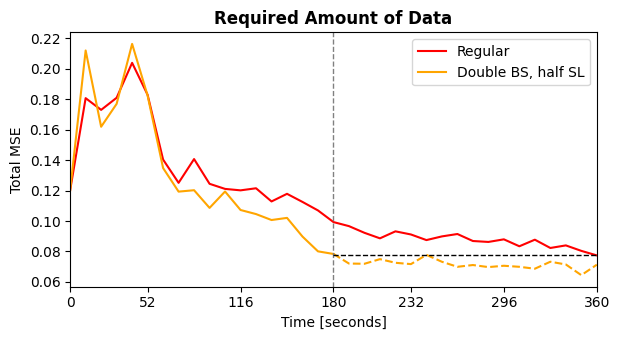

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Subsample the data
subsampled_best = total_df_best.mean(axis=0).iloc[::2].copy()
subsampled_best.index = range(0, len(subsampled_best))

# Compute the last value of 'Regular' and 'Double BS, half SL'
last_value_regular = total_df_offline.mean(axis=0).iloc[-1]
last_value_best = total_df_best.mean(axis=0).iloc[-1]

# Calculate the position corresponding to 180 seconds
x_180 = 180 * len(total_df_offline.mean(axis=0)) / 360

# Prepare x and y values
x_values = np.arange(len(subsampled_best))
y_values = subsampled_best

# Find indices around 180 seconds
idx_180 = np.searchsorted(x_values, x_180, side='left')

# Split the data into segments
x_before = x_values[:idx_180]
y_before = y_values.iloc[:idx_180]

x_after = x_values[idx_180 - 1:]
y_after = y_values.iloc[idx_180 - 1:]

# Set up the plot with specified figure size
fig, ax1 = plt.subplots(figsize=(9*0.7, 5*0.7))

# Plot 'Regular' data
ax1.plot(total_df_offline.mean(axis=0), label='Regular', color='red')

# Plot 'Double BS, half SL' data with dashed line after 180 seconds
ax1.plot(x_before, y_before, linestyle='-', color='orange', label='Double BS, half SL')
ax1.plot(x_after, y_after, linestyle='--', color='orange')

# Set title and labels
ax1.set_title('Required Amount of Data', fontweight='bold')
ax1.set_ylabel('Total MSE')
ax1.set_xlabel('Time [seconds]')

# Set x-axis limits and scale
num_ticks = 7
tick_positions = np.linspace(0, len(total_df_offline.mean(axis=0)) - 1, num_ticks, dtype=int)
tick_labels = [int(i * 360 / (len(total_df_offline.mean(axis=0)) - 1)) for i in tick_positions]

ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels)
ax1.set_xlim(0, len(total_df_offline.mean(axis=0)) - 1)

# # Add vertical line at 180 seconds
# ax1.axvline(x=tick_positions[3], color='gray', linestyle='--', linewidth=1)

# # Add horizontal line at the last value of 'Regular'
# ax1.axhline(y=last_value_regular, color='black', linestyle='--', linewidth=1)

# Plot partial vertical and horizontal lines up to the crossing point
cross_x = tick_positions[3]
cross_y = last_value_regular

# Add vertical line up to the crossing point
# ax1.vlines(x=cross_x, ymin=ax1.get_ylim()[0], ymax=cross_y, color='gray', linestyle='--', linewidth=1)
ax1.axvline(x=tick_positions[3], color='gray', linestyle='--', linewidth=1)

# Add horizontal line up to the crossing point
ax1.hlines(y=cross_y, xmin=cross_x, xmax=cross_x*2, color='black', linestyle='--', linewidth=1)


# Add legend
ax1.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig(plot_folder / 'dataAmount.png', dpi=600)
plt.show()

plt.close(fig)


In [158]:
aggregation_df = df.drop(('participants', ""), axis=1).mean()


In [159]:
df.loc[:'P7_453', ('pert_online', 'total')].mean()

0.11183619765668278

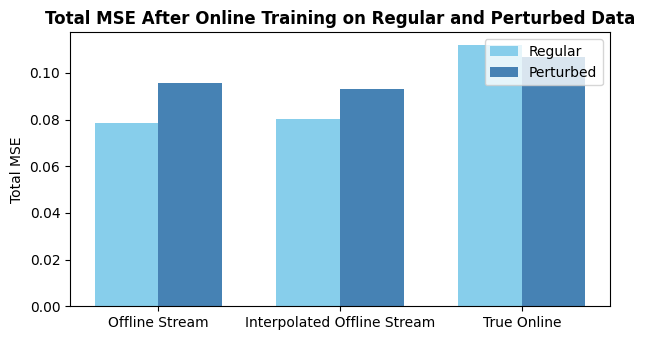

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
labels = ['Offline Stream', 'Interpolated Offline Stream', 'True Online']
regular_means = [aggregation_df.loc[('comp', 'total')], aggregation_df.loc[('comp_interp', 'total')], aggregation_df.loc[('pert_online', 'total')]]
perturbed_means = [aggregation_df.loc[('pert_comp', 'total')], aggregation_df.loc[('pert_comp_interp', 'total')], aggregation_df.loc[('online', 'total')]]

# Set the bar width and positions
bar_width = 0.35
x = np.arange(len(labels))

# Set up the plot
fig, ax = plt.subplots(figsize=(9*0.7, 5*0.7))

# Plot bars for Regular and Perturbed
bars1 = ax.bar(x - bar_width / 2, regular_means, bar_width, label='Regular', color='skyblue')
bars2 = ax.bar(x + bar_width / 2, perturbed_means, bar_width, label='Perturbed', color='steelblue')

# Add labels, title, and custom x-axis tick labels
# ax.set_xlabel('Data Type')
ax.set_ylabel('Total MSE')
ax.set_title('Total MSE After Online Training on Regular and Perturbed Data', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add a legend
ax.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.savefig(plot_folder / 'realTime.png', dpi=600)
plt.show()



In [161]:
# # predict trajectories

# import argparse
# import math
# import os
# import yaml
# os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
# import torch
# import numpy as np
# from os.path import join
# import wandb
# import multiprocessing

# from helpers.predict_utils import Config, get_data, train_model, rescale_data, evaluate_model
# from helpers.models import TimeSeriesRegressorWrapper

# for person_dir in online_participants:
#     for perturb in [True, False]:
        
#         allow_tf32 = True
#         visualize = False
#         config_name = 'modular_online'
        
#         sampling_frequency = 60
#         experiment_name = 'perturb' if perturb else 'non_perturb'
        
#         device = torch.device("cpu")

#         if allow_tf32:
#             torch.backends.cuda.matmul.allow_tf32 = True
#             print('TF32 enabled')
        
#         with open(join('data', person_dir, 'configs', f'{config_name}.yaml'), 'r') as file:
#             wandb_config = yaml.safe_load(file)
#             config = Config(wandb_config)
        
#         data_dirs = [join('data', person_dir, 'recordings', recording, 'experiments', '1') for recording in
#                      config.recordings]
        
#         test_dirs = [join('data', person_dir, 'recordings', recording, 'experiments', '1') for recording in
#                      config.test_recordings] if config.test_recordings is not None else []
#         perturb_file = join('data', person_dir, 'online_trials', experiment_name,
#                             'perturber.npy')
        
#         intact_hand = config.targets[0][0]
        
#         trainsets, valsets, combined_sets, testsets = get_data(config, data_dirs, intact_hand, visualize=visualize, test_dirs=test_dirs, perturb_file=perturb_file)
        
#         config.person_dir = person_dir
#         config.intact_hand = intact_hand
#         config.experiment_name = experiment_name
#         config.perturb = perturb
#         config.wandb_project = 'study_participants_online'
#         config.wandb_mode = 'disabled'
#         if perturb:
#             config.name = config.name + '_perturb'
                
#         wandb.init(mode=config.wandb_mode, project=config.wandb_project, name=config.name, config=config)
#         config = wandb.config
        
#         model = TimeSeriesRegressorWrapper(device=device, input_size=len(config.features),
#                                            output_size=len(config.targets),
#                                            **config)
#         model.to('cpu')
#         model.load(join('data', person_dir, 'online_trials', experiment_name, 'models', f'{person_dir}-online_last.pt'))
#         model.to(device)
#         model.eval()
        
#         for recording, testset in zip(config.test_recordings, testsets):
#             pred = model.predict(testset, config.features, config.targets).squeeze(0)
#             save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'after_online'
#             os.makedirs(save_dir, exist_ok=True)
#             np.save(save_dir / 'pred.npy' , pred)
            
#         for recording, valset in zip(config.recordings, valsets):
#             pred = model.predict(valset, config.features, config.targets).squeeze(0)
#             save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'after_online'
#             os.makedirs(save_dir, exist_ok=True)
#             np.save(save_dir / 'pred.npy', pred)

            
            
#         model.to('cpu')
#         model.load(join('data', person_dir, 'online_trials', experiment_name, 'models', f'{person_dir}-online_0.pt'))
#         model.to(device)
#         model.eval()

#         for recording, testset in zip(config.test_recordings, testsets):
#             pred = model.predict(testset, config.features, config.targets).squeeze(0)
#             save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'before_online'
#             os.makedirs(save_dir, exist_ok=True)
#             np.save(save_dir / 'pred.npy', pred)

#         for recording, valset in zip(config.recordings, valsets):
#             pred = model.predict(valset, config.features, config.targets).squeeze(0)
#             save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'before_online'
#             os.makedirs(save_dir, exist_ok=True)
#             np.save(save_dir / 'pred.npy', pred)
            

#         # GT
#         for recording, testset in zip(config.test_recordings, testsets):
#             pred = testset[config.targets].values
#             save_dir = data_folder / 'trajectories' / person_dir / recording / 'GT'
#             os.makedirs(save_dir, exist_ok=True)
#             np.save(save_dir / 'pred.npy', pred)

#         for recording, valset in zip(config.recordings, valsets):
#             pred = valset[config.targets].values
#             save_dir = data_folder / 'trajectories' / person_dir / recording / 'GT'
#             os.makedirs(save_dir, exist_ok=True)
#             np.save(save_dir / 'pred.npy', pred)



In [116]:
# # predict trajectories SANITY CHECK

# import argparse
# import math
# import os
# import yaml
# os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
# import torch
# import numpy as np
# from os.path import join
# import wandb
# import multiprocessing

# from helpers.predict_utils import Config, get_data, train_model, rescale_data, evaluate_model
# from helpers.models import TimeSeriesRegressorWrapper

# for person_dir in ['P6_']:
#     for perturb in [True, False]:
        
#         allow_tf32 = True
#         visualize = False
#         config_name = 'modular_online'
        
#         sampling_frequency = 60
#         experiment_name = 'perturb' if perturb else 'non_perturb'
        
#         device = torch.device("cpu")

#         if allow_tf32:
#             torch.backends.cuda.matmul.allow_tf32 = True
#             print('TF32 enabled')
        
#         with open(join('data', person_dir, 'configs', f'{config_name}.yaml'), 'r') as file:
#             wandb_config = yaml.safe_load(file)
#             config = Config(wandb_config)
        
#         data_dirs = [join('data', person_dir, 'recordings', recording, 'experiments', '1') for recording in
#                      config.recordings]
        
#         test_dirs = [join('data', person_dir, 'recordings', recording, 'experiments', '1') for recording in
#                      config.test_recordings] if config.test_recordings is not None else []
#         perturb_file = join('data', person_dir, 'online_trials', experiment_name,
#                             'perturber.npy')
        
#         intact_hand = config.targets[0][0]
        
#         trainsets, valsets, combined_sets, testsets = get_data(config, data_dirs, intact_hand, visualize=visualize, test_dirs=test_dirs, perturb_file=perturb_file)
        
#         config.person_dir = person_dir
#         config.intact_hand = intact_hand
#         config.experiment_name = experiment_name
#         config.perturb = perturb
#         config.wandb_project = 'study_participants_online'
#         config.wandb_mode = 'disabled'
#         if perturb:
#             config.name = config.name + '_perturb'
                
#         wandb.init(mode=config.wandb_mode, project=config.wandb_project, name=config.name, config=config)
#         config = wandb.config
        
#         model = TimeSeriesRegressorWrapper(device=device, input_size=len(config.features),
#                                            output_size=len(config.targets),
#                                            **config)
#         # model.to('cpu')
#         # model.load(join('data', person_dir, 'online_trials', experiment_name, 'models', f'{person_dir}-online_last.pt'))
#         # model.to(device)
#         # model.eval()
        
#         # for recording, testset in zip(config.test_recordings, testsets):
#         #     pred = model.predict(testset, config.features, config.targets).squeeze(0)
#         #     save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'after_online'
#         #     os.makedirs(save_dir, exist_ok=True)
#         #     np.save(save_dir / 'pred.npy' , pred)
            
#         # for recording, valset in zip(config.recordings, valsets):
#         #     pred = model.predict(valset, config.features, config.targets).squeeze(0)
#         #     save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'after_online'
#         #     os.makedirs(save_dir, exist_ok=True)
#         #     np.save(save_dir / 'pred.npy', pred)

            
            
#         model.to('cpu')
#         model.load(join('data', person_dir, 'models', f'sanity_check.pt'))
#         model.to(device)
#         model.eval()

#         for recording, testset in zip(config.test_recordings, testsets):
#             pred = model.predict(testset, config.features, config.targets).squeeze(0)
#             save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'before_online'
#             os.makedirs(save_dir, exist_ok=True)
#             np.save(save_dir / 'pred-SC.npy', pred)

#         for recording, valset in zip(config.recordings, valsets):
#             pred = model.predict(valset, config.features, config.targets).squeeze(0)
#             save_dir = data_folder / 'trajectories' / person_dir / recording / f"perturb_{perturb}" / 'before_online'
#             os.makedirs(save_dir, exist_ok=True)
#             np.save(save_dir / 'pred-SC.npy', pred)
            

#         # # GT
#         # for recording, testset in zip(config.test_recordings, testsets):
#         #     pred = testset[config.targets].values
#         #     save_dir = data_folder / 'trajectories' / person_dir / recording / 'GT'
#         #     os.makedirs(save_dir, exist_ok=True)
#         #     np.save(save_dir / 'pred.npy', pred)

#         # for recording, valset in zip(config.recordings, valsets):
#         #     pred = valset[config.targets].values
#         #     save_dir = data_folder / 'trajectories' / person_dir / recording / 'GT'
#         #     os.makedirs(save_dir, exist_ok=True)
#         #     np.save(save_dir / 'pred.npy', pred)



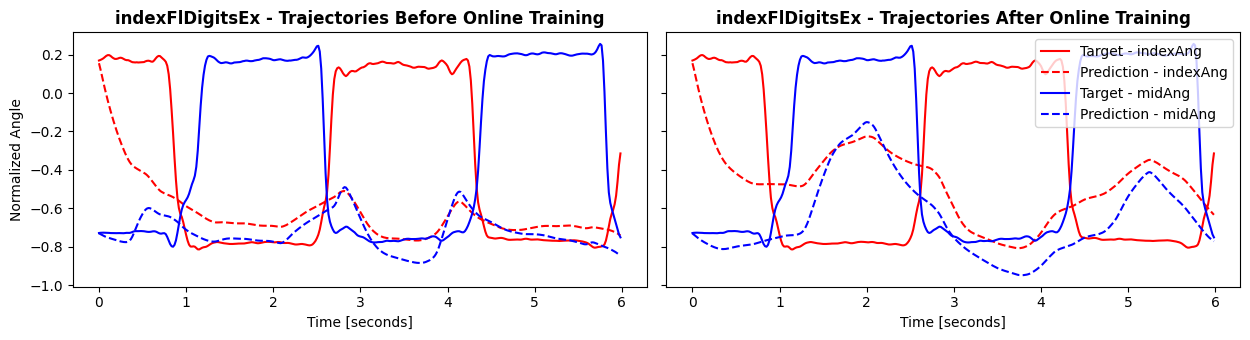

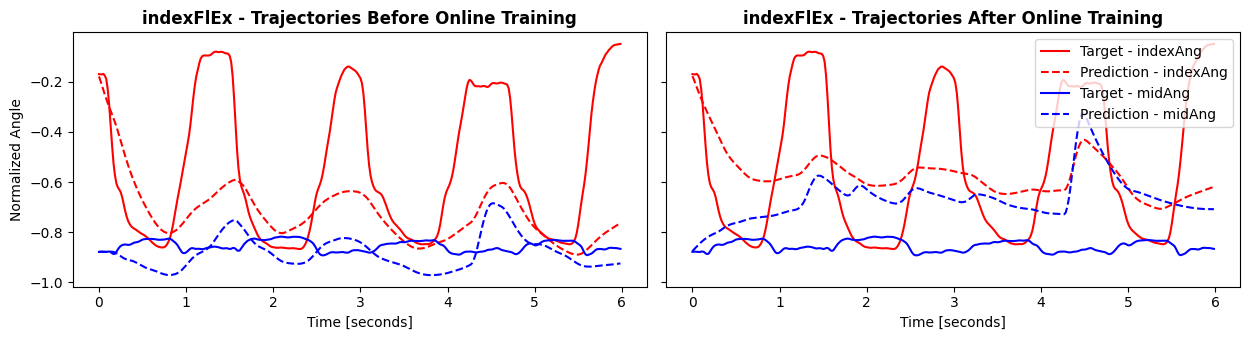

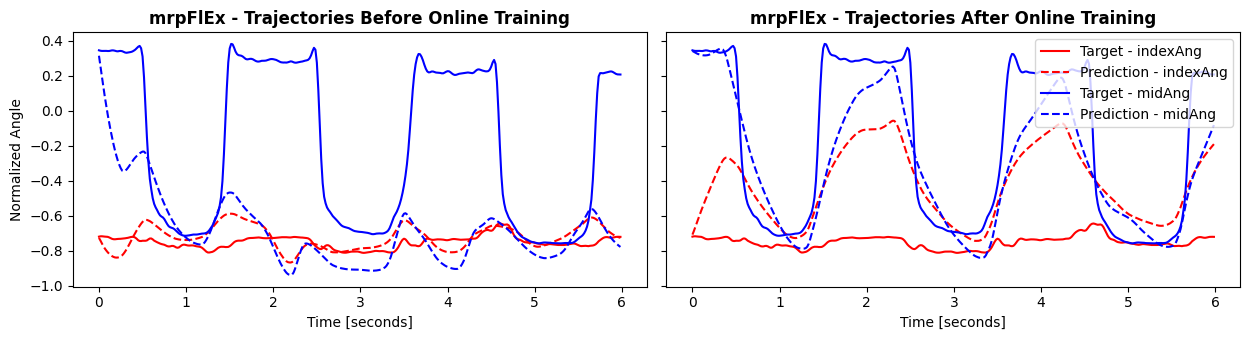

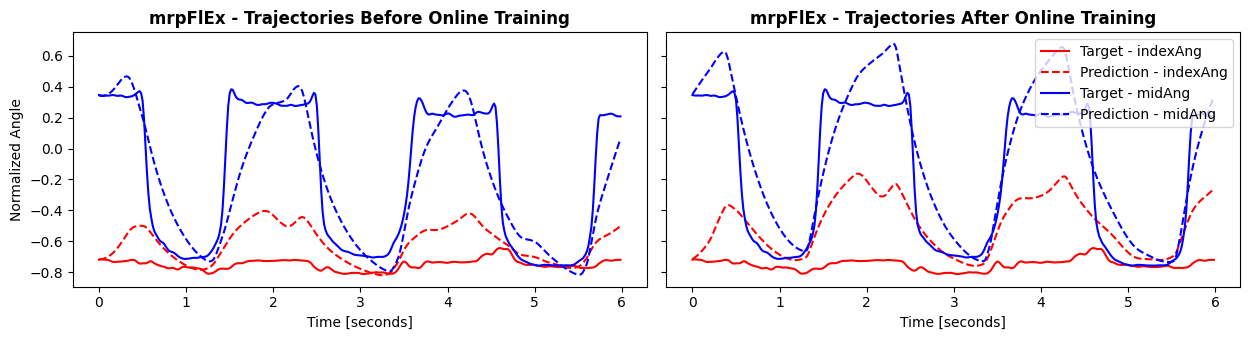

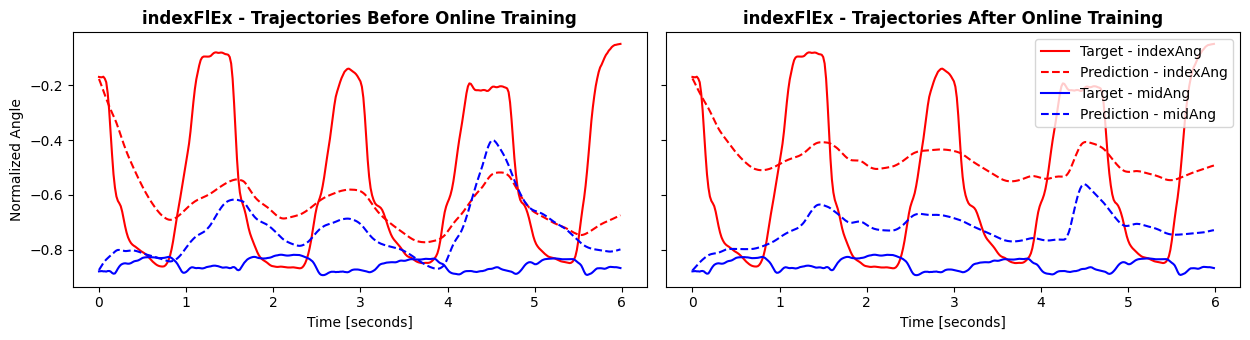

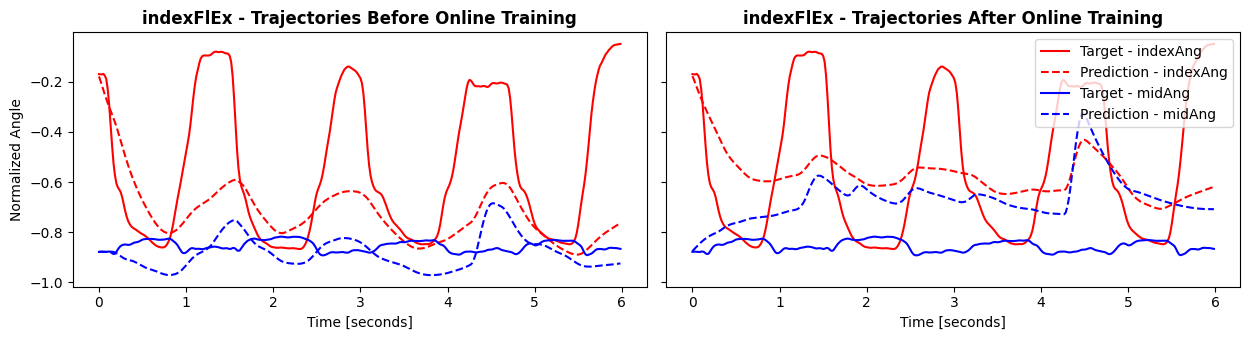

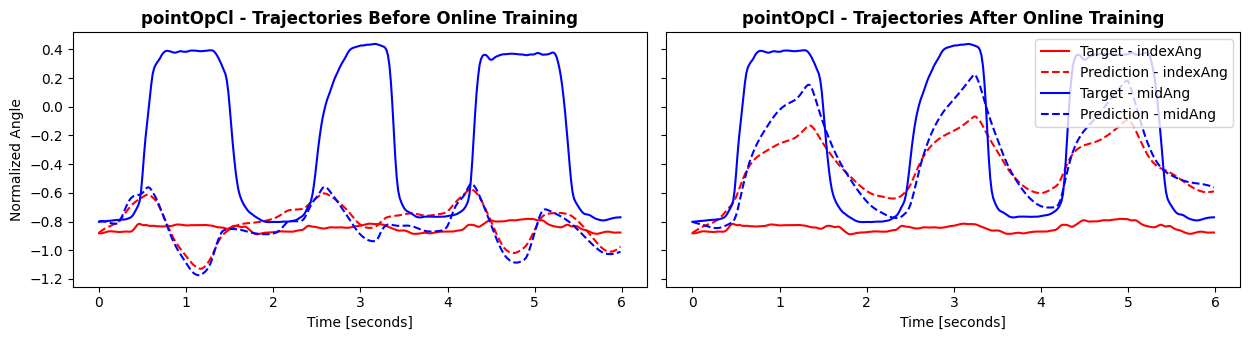

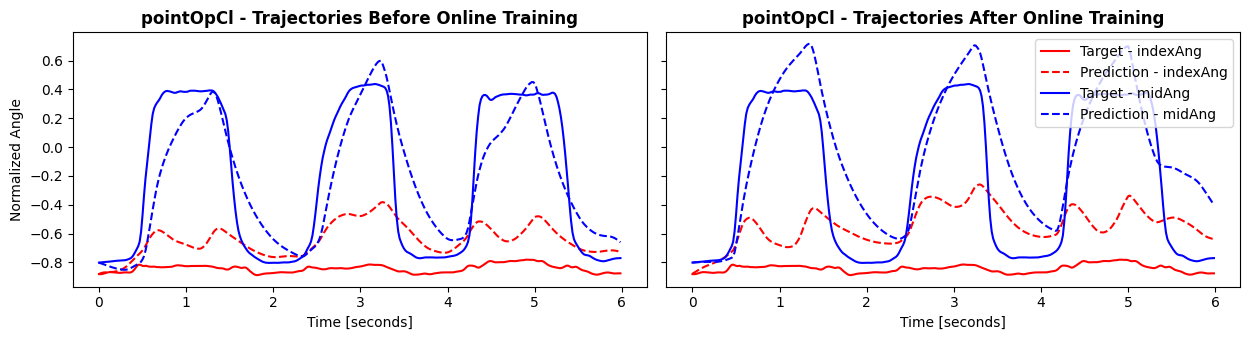

In [117]:
# PLOT trajectory_test

# indices = range(7)
# plot_participants = online_participants
# plot_recordings = recordings + test_recordings

plot_participants = ['P7_453']
plot_folder = Path('full_page_plots')

# # 1
# indices = [4, 5] # ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
# plot_recordings = ['keyOpCl', 'thumbFlEx', 'thumbAbAd', 'pinchOpCl']

# # 2
# indices = [2, 6] # ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
# plot_recordings = ['wristFlHandCl', 'wristFlEx', 'handOpCl', 'fingersFlEx']

# 3
indices = [0, 1] # ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
plot_recordings = ['indexFlDigitsEx', 'indexFlEx', 'mrpFlEx', 'indexFlEx', 'pointOpCl']


colors = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080', '#00FFFF', '#FF00FF']
for person_id in plot_participants:
    for recording in plot_recordings:
        # person_id = 'P7_453'
        # recording = 'fingersFlEx'
        for perturb in [True, False]:
                        
            gt_path = data_folder / 'trajectories' / person_id / recording / 'GT'
            before_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{perturb}" / 'before_online'
            after_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{perturb}" / 'after_online'
            
            gt = np.load(gt_path / 'pred.npy')
            before = np.load(before_path / 'pred.npy')
            after = np.load(after_path / 'pred.npy')
            
            x_values = range(len(gt))
            
            # Create a figure and two subplots side by side
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18*0.7, 5*0.7), sharey=True)
            
            # Plot on the first subplot
            for i in indices:
                ax1.plot(x_values, gt[:, i], label=f'Target - {targets[i]}', color=colors[i])
                ax1.plot(x_values, before[:, i], label=f'Prediction - {targets[i]}', color=colors[i], linestyle='--')
            
                ax2.plot(x_values, gt[:, i], label=f'Target - {targets[i]}', color=colors[i])
                ax2.plot(x_values, after[:, i], label=f'Prediction - {targets[i]}', color=colors[i], linestyle='--')
                
            ax1.set_xlabel('Time [seconds]')  # Original x-axis label
            ax1.set_ylabel('Normalized Angle')  # y-axis label
            ax1.set_title(f'{recording} - Trajectories Before Online Training', fontweight='bold')  # Title
            # Set x-axis ticks and labels for ax1
            ax1.set_xticks(range(0, len(x_values)+1, 60))  # Set ticks based on the length of x_values
            ax1.set_xticklabels([f'{i}' for i in range(len(x_values)//60+1)])  # Scale labels from 0 to 6
            
            ax2.set_xlabel('Time [seconds]')  # Original x-axis label
            # ax2.set_ylabel('Normalized Angle')  # y-axis label (shared with ax1)
            ax2.set_title(f'{recording} - Trajectories After Online Training', fontweight='bold')  # Title
            ax2.legend(loc='upper right')
            # Set x-axis ticks and labels for ax2
            ax2.set_xticks(range(0, len(x_values)+1, 60))  # Set ticks based on the length of x_values
            ax2.set_xticklabels([f'{i}' for i in range(len(x_values)//60+1)])  # Scale labels from 0 to 6   
            
            
            
            # Adjust layout to prevent overlap
            plt.tight_layout()
            save_dir = plot_folder / 'trajectories' / f'perturb_{perturb}' / recording
            os.makedirs(save_dir, exist_ok=True)
            # plt.savefig(save_dir / f'{person_id}.png', dpi=300)
            plt.show()
            plt.close(fig)

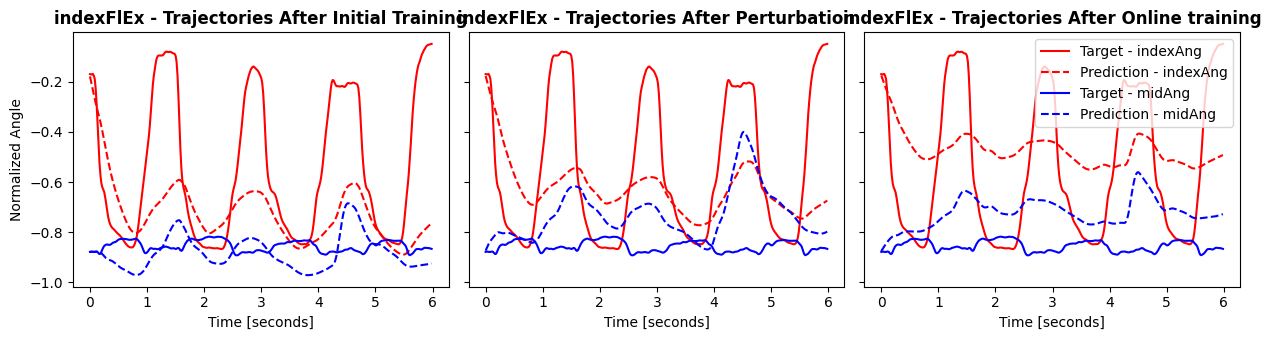

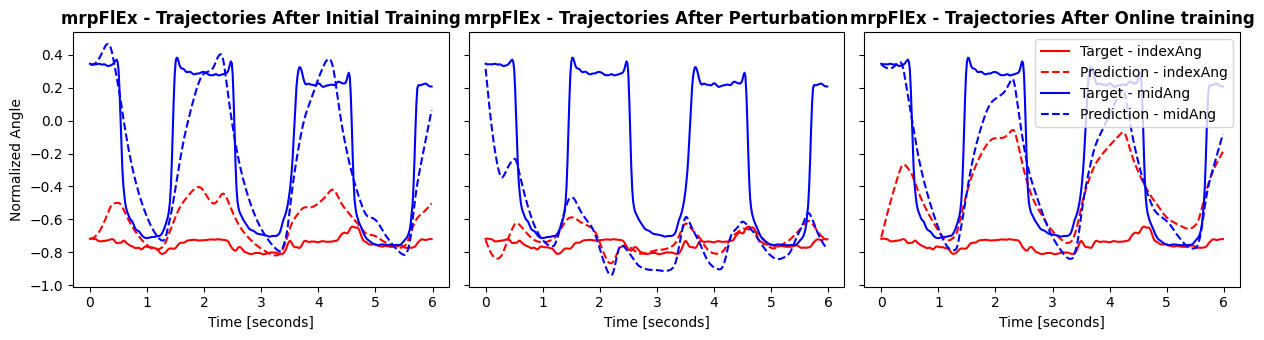

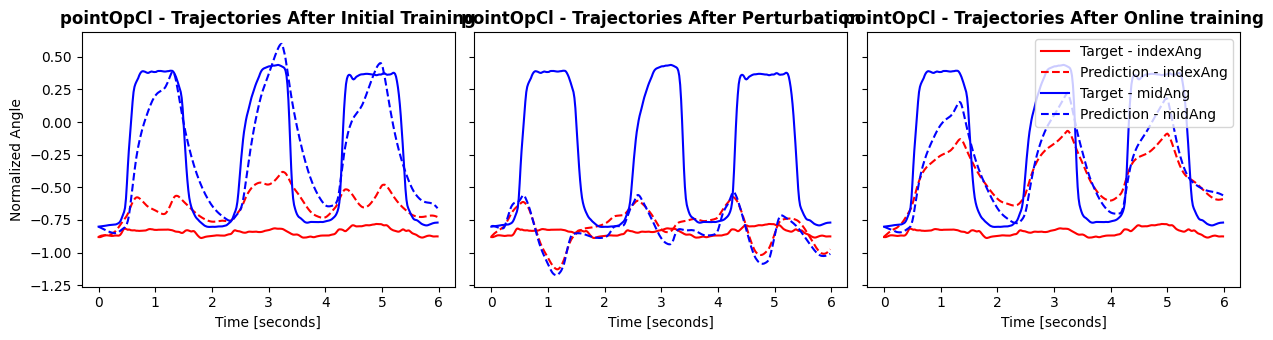

In [118]:
# PLOT trajectory_test

person_id = 'P7_453'
plot_folder = Path('full_page_plots')

# # 1
# indices = [4, 5] # ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
# plot_recordings = ['keyOpCl', 'thumbFlEx', 'thumbAbAd', 'pinchOpCl']

# # 2
# indices = [2, 6] # ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
# plot_recordings = ['wristFlHandCl', 'wristFlEx', 'handOpCl', 'fingersFlEx']

# 3
indices = [0, 1] # ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']
plot_recordings = ['indexFlDigitsEx', 'indexFlEx', 'mrpFlEx', 'pointOpCl']


colors = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080', '#00FFFF', '#FF00FF']
for recording in plot_recordings:
    # person_id = 'P7_453'
    # recording = 'fingersFlEx'
                    
    gt_path = data_folder / 'trajectories' / person_id / recording / 'GT'
    after_init_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{False}" / 'before_online'
    before_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{True}" / 'before_online'
    after_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{True}" / 'after_online'
    
    gt = np.load(gt_path / 'pred.npy')
    after_init = np.load(after_init_path / 'pred.npy')
    before = np.load(before_path / 'pred.npy')
    after = np.load(after_path / 'pred.npy')
    
    x_values = range(len(gt))
    
    # Create a figure and two subplots side by side
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18*0.7, 5*0.7), sharey=True)
    
    # Plot on the first subplot
    for i in indices:
        ax1.plot(x_values, gt[:, i], label=f'Target - {targets[i]}', color=colors[i])
        ax1.plot(x_values, after_init[:, i], label=f'Prediction - {targets[i]}', color=colors[i], linestyle='--')

        ax2.plot(x_values, gt[:, i], label=f'Target - {targets[i]}', color=colors[i])
        ax2.plot(x_values, before[:, i], label=f'Prediction - {targets[i]}', color=colors[i], linestyle='--')
    
        ax3.plot(x_values, gt[:, i], label=f'Target - {targets[i]}', color=colors[i])
        ax3.plot(x_values, after[:, i], label=f'Prediction - {targets[i]}', color=colors[i], linestyle='--')
        
    ax1.set_xlabel('Time [seconds]')  # Original x-axis label
    ax1.set_ylabel('Normalized Angle')  # y-axis label
    ax1.set_title(f'{recording} - Trajectories After Initial Training', fontweight='bold')  # Title
    ax1.set_xticks(range(0, len(x_values)+1, 60))  # Set ticks based on the length of x_values
    ax1.set_xticklabels([f'{i}' for i in range(len(x_values)//60+1)])  # Scale labels from 0 to 6
    
    ax2.set_xlabel('Time [seconds]')  # Original x-axis label
    ax2.set_title(f'{recording} - Trajectories After Perturbation', fontweight='bold')  # Title
    ax2.set_xticks(range(0, len(x_values)+1, 60))  # Set ticks based on the length of x_values
    ax2.set_xticklabels([f'{i}' for i in range(len(x_values)//60+1)])  # Scale labels from 0 to 6   
            
    ax3.set_xlabel('Time [seconds]')  # Original x-axis label
    ax3.set_title(f'{recording} - Trajectories After Online training', fontweight='bold')  # Title
    ax3.legend(loc='upper right')
    ax3.set_xticks(range(0, len(x_values)+1, 60))  # Set ticks based on the length of x_values
    ax3.set_xticklabels([f'{i}' for i in range(len(x_values)//60+1)])  # Scale labels from 0 to 6   
    
    
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    save_dir = plot_folder / 'trajectories' / f'perturb_{perturb}' / recording
    os.makedirs(save_dir, exist_ok=True)
    # plt.savefig(save_dir / f'{person_id}.png', dpi=300)
    plt.show()
    plt.close(fig)

In [119]:
gt.shape

(360, 7)

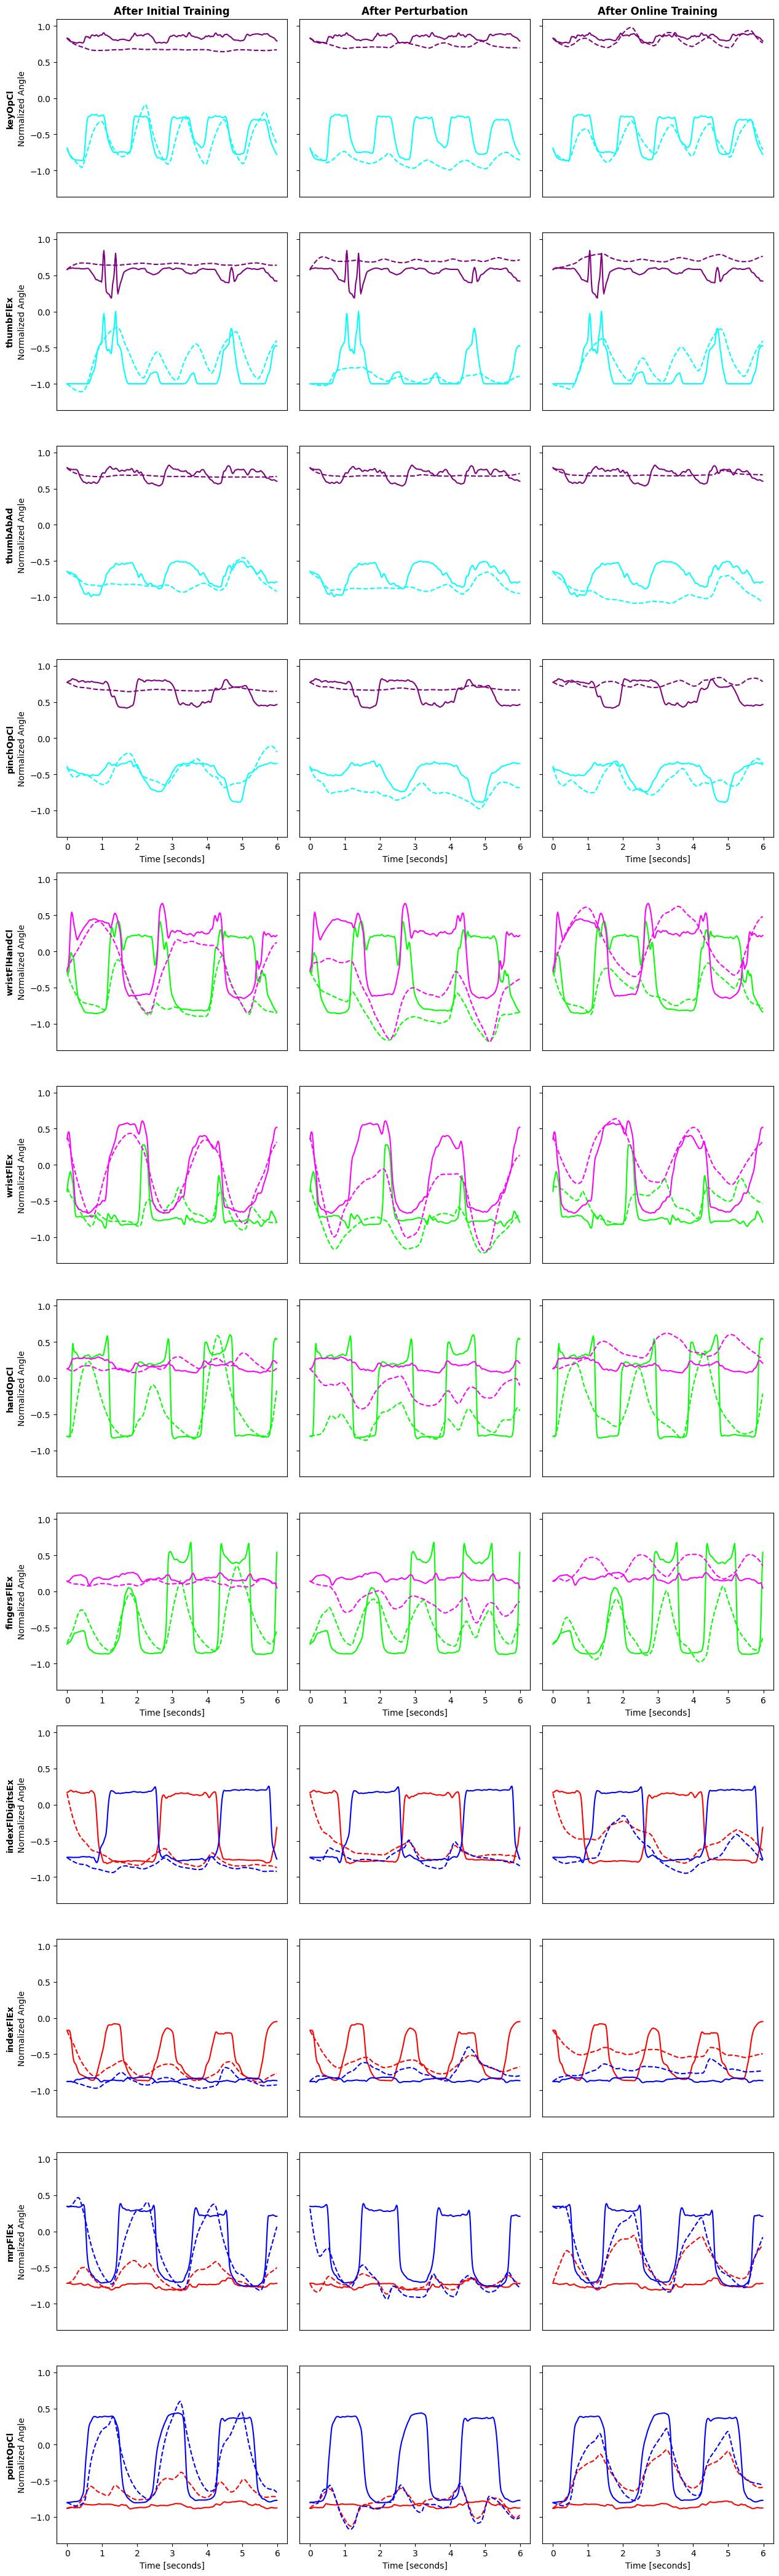

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

person_id = 'P7_453'
plot_folder = Path('full_page_plots')

# Define all indices and recordings in sequence
plot_settings = [
    {
        "indices": [4, 5],
        "plot_recordings": ['keyOpCl', 'thumbFlEx', 'thumbAbAd', 'pinchOpCl']
    },
    {
        "indices": [2, 6],
        "plot_recordings": ['wristFlHandCl', 'wristFlEx', 'handOpCl', 'fingersFlEx']
    },
    {
        "indices": [0, 1],
        "plot_recordings": ['indexFlDigitsEx', 'indexFlEx', 'mrpFlEx', 'pointOpCl']
    }
]

colors = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080', '#00FFFF', '#FF00FF']
targets = ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']

# Flatten plot recordings and keep track of indices per recording set
all_recordings = []
for setting in plot_settings:
    all_recordings.extend(setting["plot_recordings"])

# Set up the figure for all recordings in one plot
fig, axes = plt.subplots(len(all_recordings), 3, figsize=(18*0.7, 5*0.7 * len(all_recordings)), sharey=True)

row_index = 0  # Track current row index in figure
for setting in plot_settings:
    indices = setting["indices"]
    group_recordings = setting["plot_recordings"]
    
    for i, recording in enumerate(group_recordings):
        gt_path = data_folder / 'trajectories' / person_id / recording / 'GT'
        after_init_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{False}" / 'before_online'
        before_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{True}" / 'before_online'
        after_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{True}" / 'after_online'
        
        gt = np.load(gt_path / 'pred.npy')
        after_init = np.load(after_init_path / 'pred.npy')
        before = np.load(before_path / 'pred.npy')
        after = np.load(after_path / 'pred.npy')

        # pd.DataFrame(gt).to_csv(gt_path / 'pred.csv')
        # pd.DataFrame(after_init).to_csv(after_init_path / 'pred.csv')
        # pd.DataFrame(before).to_csv(before_path / 'pred.csv')
        # pd.DataFrame(after).to_csv(after_path / 'pred.csv')

        np.savetxt(gt_path / 'pred.csv', gt, delimiter=',') # , header=','.join(range(gt.shape[1])))
        np.savetxt(after_init_path / 'pred.csv', after_init, delimiter=',')
        np.savetxt(before_path / 'pred.csv', before, delimiter=',')
        np.savetxt(after_path / 'pred.csv', after, delimiter=',')

        
        x_values = range(len(gt))
        
        # Access the three subplots in the row for this recording
        ax1, ax2, ax3 = axes[row_index]
        
        # Plot trajectories
        for j in indices:
            ax1.plot(x_values, gt[:, j], label=f'Target - {targets[j]}', color=colors[j])
            ax1.plot(x_values, after_init[:, j], label=f'Prediction - {targets[j]}', color=colors[j], linestyle='--')
            
            ax2.plot(x_values, gt[:, j], label=f'Target - {targets[j]}', color=colors[j])
            ax2.plot(x_values, before[:, j], label=f'Prediction - {targets[j]}', color=colors[j], linestyle='--')
            
            ax3.plot(x_values, gt[:, j], label=f'Target - {targets[j]}', color=colors[j])
            ax3.plot(x_values, after[:, j], label=f'Prediction - {targets[j]}', color=colors[j], linestyle='--')
        
        # Set titles for the first row only
        if row_index == 0:
            ax1.set_title('After Initial Training', fontweight='bold')
            ax2.set_title('After Perturbation', fontweight='bold')
            ax3.set_title('After Online Training', fontweight='bold')
        
        # Show x-axis labels only for the last row of each group
        if i == len(group_recordings) - 1:
            for ax in [ax1, ax2, ax3]:
                ax.set_xticks(range(0, len(x_values)+1, 60))
                ax.set_xticklabels([f'{k}' for k in range(len(x_values)//60+1)])
                ax.set_xlabel('Time [seconds]')
        else:
            for ax in [ax1, ax2, ax3]:
                ax.set_xticks([])
                ax.set_xticklabels([])
        
        # Set y-axis label for the first column only
        ax1.set_ylabel('Normalized Angle')
        
        # Add movement names vertically on the left side of each row
        ax1.text(-0.2, 0.5, recording, rotation=90, ha='center', va='center', transform=ax1.transAxes, fontweight='bold')
        
        row_index += 1  # Move to the next row in the figure

# Adjust layout for all plots
plt.tight_layout()
save_dir = plot_folder / 'trajectories' / f'perturb_{True}'
os.makedirs(save_dir, exist_ok=True)
# plt.savefig(save_dir / f'{person_id}_all_recordings.png', dpi=600)
plt.show()
plt.close(fig)


In [121]:
g = np.load("/Users/jg/Desktop/upper_limb/paper_data-2/trajectories/P7_453/pointOpCl/GT/pred.npy")
plt.plot(g[:, 0])
plt.show()

In [122]:
pd.DataFrame(g).to_csv("/Users/jg/Desktop/upper_limb/paper_data-2/trajectories/P7_453/pointOpCl/GT/pred.csv")

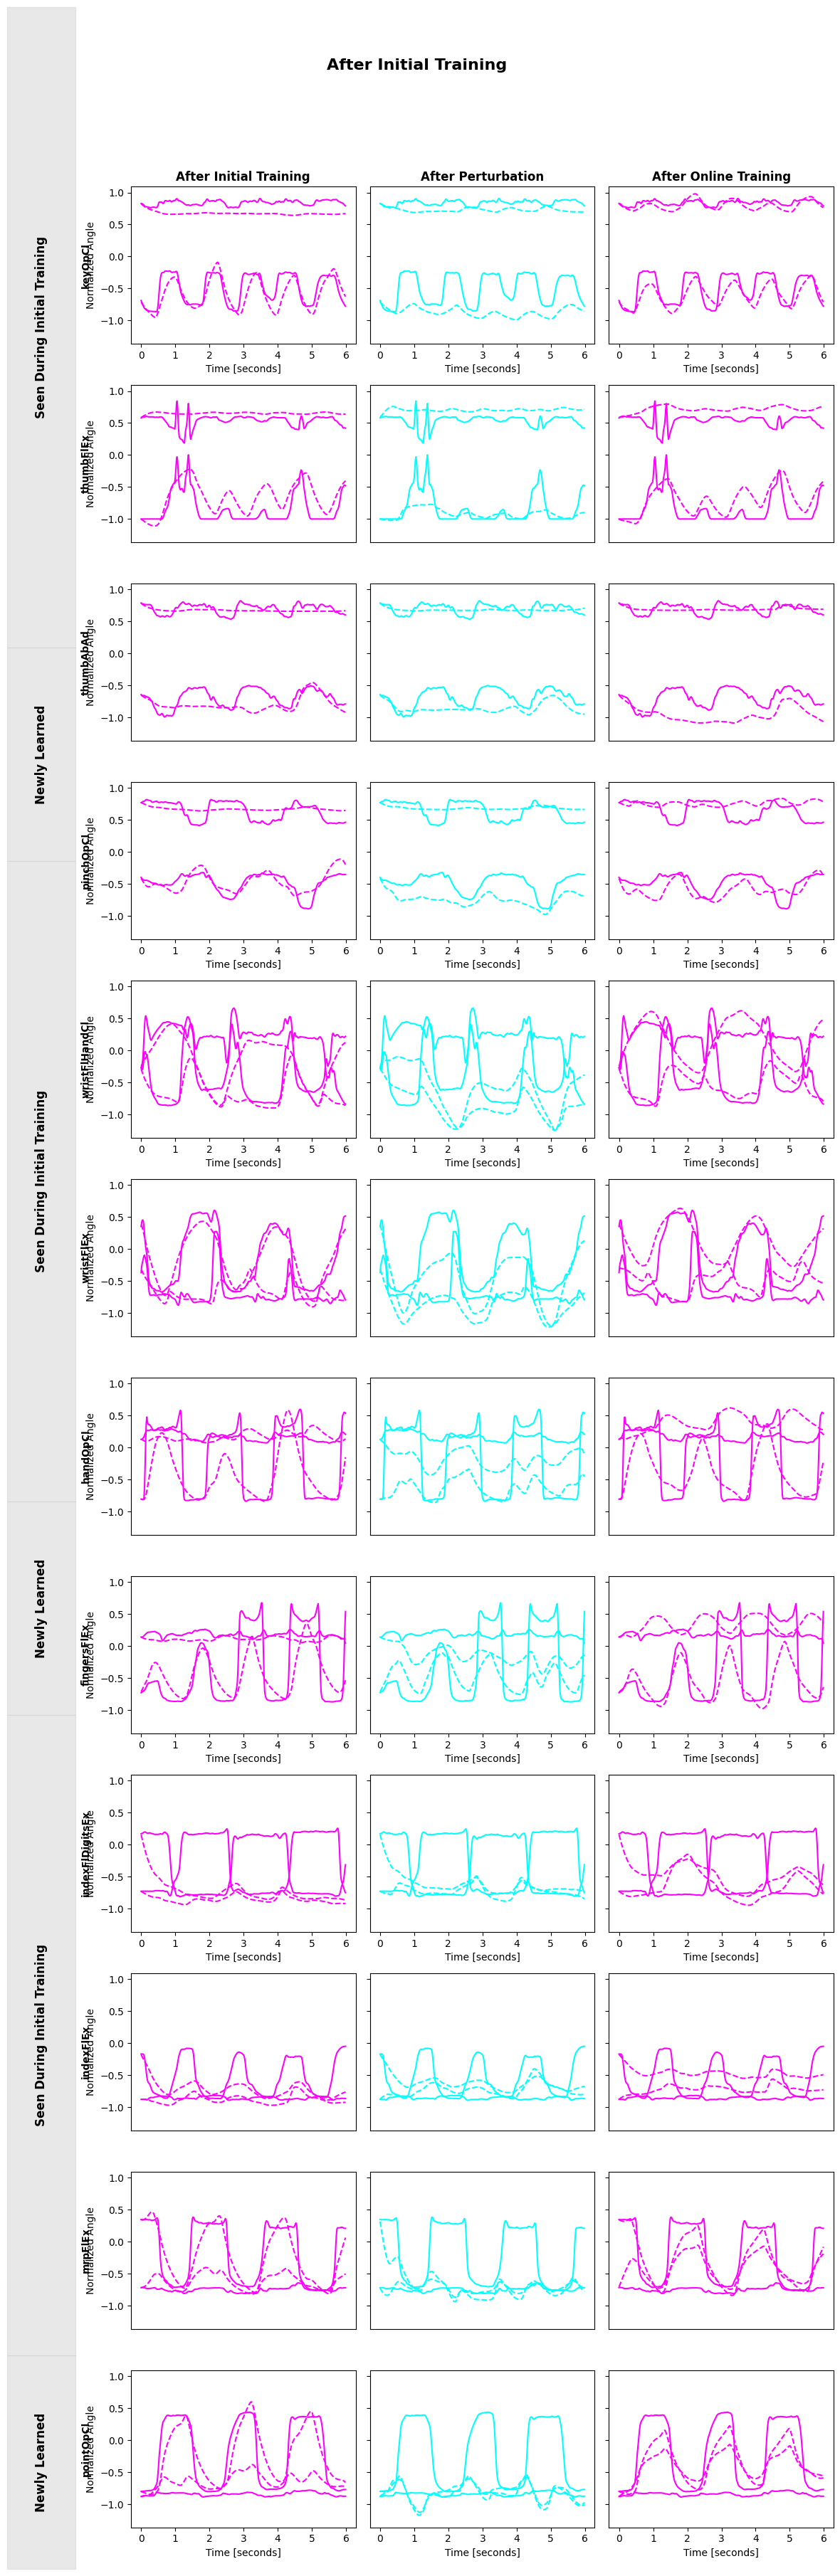

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
from matplotlib.patches import Rectangle

person_id = 'P7_453'
plot_folder = Path('full_page_plots')

# Define all indices and recordings in sequence
plot_settings = [
    {
        "indices": [4, 5],
        "plot_recordings": ['keyOpCl'],
        "group_label": "Newly Learned"
    },
    {
        "indices": [4, 5],
        "plot_recordings": ['thumbFlEx', 'thumbAbAd', 'pinchOpCl'],
        "group_label": "Seen During Initial Training"
    },
    {
        "indices": [2, 6],
        "plot_recordings": ['wristFlHandCl'],
        "group_label": "Newly Learned"
    },
    {
        "indices": [2, 6],
        "plot_recordings": ['wristFlEx', 'handOpCl', 'fingersFlEx'],
        "group_label": "Seen During Initial Training"
    },
    {
        "indices": [0, 1],
        "plot_recordings": ['indexFlDigitsEx'],
        "group_label": "Newly Learned"
    },
    {
        "indices": [0, 1],
        "plot_recordings": ['indexFlEx', 'mrpFlEx', 'pointOpCl'],
        "group_label": "Seen During Initial Training"
    }
]

colors = ['#FF00FF', '#00FFFF']  # Adjust colors to match screenshot style
targets = ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']

# Flatten plot recordings and keep track of indices per recording set
all_recordings = []
for setting in plot_settings:
    all_recordings.extend(setting["plot_recordings"])

# Set up the figure for all recordings in one plot
fig, axes = plt.subplots(len(all_recordings), 3, figsize=(12, 3 * len(all_recordings)), sharey=True)

# Reduce vertical space between plots within groups
plt.subplots_adjust(hspace=0.1)
fig.suptitle("After Initial Training", fontsize=16, fontweight='bold')

row_index = 0  # Track current row index in figure
for setting in plot_settings:
    indices = setting["indices"]
    group_recordings = setting["plot_recordings"]
    group_label = setting["group_label"]

    # Calculate vertical box position and height to cover the group's rows
    group_start = row_index / len(all_recordings)
    group_height = len(group_recordings) / len(all_recordings)

    # Add a vertical box that spans the height of the group's rows
    fig.patches.extend([
        Rectangle(
            (0.02, group_start),  # Position just left of the plots
            0.08,  # Width of the box
            group_height,  # Height to span the group rows
            transform=fig.transFigure, 
            color="lightgray", 
            alpha=0.5,
            zorder=0
        )
    ])

    # Add the group label vertically centered in the box
    fig.text(0.06, group_start + group_height / 2, group_label, ha='center', va='center', 
             rotation='vertical', fontweight='bold', color='black', fontsize=12)

    for i, recording in enumerate(group_recordings):
        gt_path = data_folder / 'trajectories' / person_id / recording / 'GT'
        after_init_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{False}" / 'before_online'
        before_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{True}" / 'before_online'
        after_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{True}" / 'after_online'
        
        gt = np.load(gt_path / 'pred.npy')
        after_init = np.load(after_init_path / 'pred.npy')
        before = np.load(before_path / 'pred.npy')
        after = np.load(after_path / 'pred.npy')
        
        x_values = range(len(gt))
        
        # Access the three subplots in the row for this recording
        ax1, ax2, ax3 = axes[row_index]
        
        # Plot trajectories
        for j in indices:
            ax1.plot(x_values, gt[:, j], label=f'Target - {targets[j]}', color=colors[0])
            ax1.plot(x_values, after_init[:, j], label=f'Prediction - {targets[j]}', color=colors[0], linestyle='--')
            
            ax2.plot(x_values, gt[:, j], label=f'Target - {targets[j]}', color=colors[1])
            ax2.plot(x_values, before[:, j], label=f'Prediction - {targets[j]}', color=colors[1], linestyle='--')
            
            ax3.plot(x_values, gt[:, j], label=f'Target - {targets[j]}', color=colors[0])
            ax3.plot(x_values, after[:, j], label=f'Prediction - {targets[j]}', color=colors[0], linestyle='--')
        
        # Set titles for the first row only
        if row_index == 0:
            ax1.set_title('After Initial Training', fontweight='bold')
            ax2.set_title('After Perturbation', fontweight='bold')
            ax3.set_title('After Online Training', fontweight='bold')
        
        # Show x-axis labels only for the last row of each group
        if i == len(group_recordings) - 1:
            for ax in [ax1, ax2, ax3]:
                ax.set_xticks(range(0, len(x_values)+1, 60))
                ax.set_xticklabels([f'{k}' for k in range(len(x_values)//60+1)])
                ax.set_xlabel('Time [seconds]')
        else:
            for ax in [ax1, ax2, ax3]:
                ax.set_xticks([])
                ax.set_xticklabels([])
                ax.set_xlabel("")  # Ensures no reserved space for xlabel
            
        # Set y-axis label for the first column only
        ax1.set_ylabel('Normalized Angle')
        
        # Add movement names vertically on the left side of each row
        ax1.text(-0.2, 0.5, recording, rotation=90, ha='center', va='center', transform=ax1.transAxes, fontweight='bold')
        
        row_index += 1  # Move to the next row in the figure

# Adjust layout for all plots
plt.tight_layout(rect=[0.1, 0, 1, 0.95])  # Adjust layout to make room for the title
save_dir = plot_folder / 'trajectories' / f'perturb_{True}'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(save_dir / f'{person_id}_all_recordings.png', dpi=300)
plt.show()
plt.close(fig)


In [124]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

person_id = 'P7_453'
plot_folder = Path('full_page_plots')

# Define all indices and recordings in sequence
plot_settings = [
    {
        "indices": [4, 5],
        "plot_recordings": ['keyOpCl', 'thumbFlEx', 'thumbAbAd', 'pinchOpCl']
    },
    {
        "indices": [2, 6],
        "plot_recordings": ['wristFlHandCl', 'wristFlEx', 'handOpCl', 'fingersFlEx']
    },
    {
        "indices": [0, 1],
        "plot_recordings": ['indexFlDigitsEx', 'indexFlEx', 'mrpFlEx', 'pointOpCl']
    }
]

colors = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080', '#00FFFF', '#FF00FF']
targets = ['indexAng', 'midAng', 'ringAng', 'pinkyAng', 'thumbInPlaneAng', 'thumbOutPlaneAng', 'wristFlex']

# Flatten plot recordings and keep track of indices per recording set
all_recordings = []
for setting in plot_settings:
    all_recordings.extend(setting["plot_recordings"])

# Set up the figure for all recordings in one plot
fig, axes = plt.subplots(len(all_recordings), 3, figsize=(18*0.7, 5*0.7 * len(all_recordings)), sharey=True)

row_index = 0  # Track current row index in figure
for setting in plot_settings:
    indices = setting["indices"]
    group_recordings = setting["plot_recordings"]
    
    for i, recording in enumerate(group_recordings):
        # Load actual data files
        gt_path = data_folder / 'trajectories' / person_id / recording / 'GT'
        after_init_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{False}" / 'before_online'
        before_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{True}" / 'before_online'
        after_path = data_folder / 'trajectories' / person_id / recording / f"perturb_{True}" / 'after_online'
        
        gt = np.load(gt_path / 'pred.npy')
        after_init = np.load(after_init_path / 'pred.npy')
        before = np.load(before_path / 'pred.npy')
        after = np.load(after_path / 'pred.npy')
        
        x_values = range(len(gt))
        
        # Access the three subplots in the row for this recording
        ax1, ax2, ax3 = axes[row_index]
        
        # Plot trajectories
        for j in indices:
            ax1.plot(x_values, gt[:, j], label=f'Target - {targets[j]}', color=colors[j])
            ax1.plot(x_values, after_init[:, j], label=f'Prediction - {targets[j]}', color=colors[j], linestyle='--')
            
            ax2.plot(x_values, gt[:, j], label=f'Target - {targets[j]}', color=colors[j])
            ax2.plot(x_values, before[:, j], label=f'Prediction - {targets[j]}', color=colors[j], linestyle='--')
            
            ax3.plot(x_values, gt[:, j], label=f'Target - {targets[j]}', color=colors[j])
            ax3.plot(x_values, after[:, j], label=f'Prediction - {targets[j]}', color=colors[j], linestyle='--')
        
        # Set titles for the first row only
        if row_index == 0:
            ax1.set_title('After Initial Training', fontweight='bold')
            ax2.set_title('After Perturbation', fontweight='bold')
            ax3.set_title('After Online Training', fontweight='bold')
        
        # Show x-axis labels only for the last row of each group
        if i == len(group_recordings) - 1:
            for ax in [ax1, ax2, ax3]:
                ax.set_xticks(range(0, len(x_values)+1, 60))
                ax.set_xticklabels([f'{k}' for k in range(len(x_values)//60+1)])
                ax.set_xlabel('Time [seconds]')
        else:
            for ax in [ax1, ax2, ax3]:
                ax.set_xticks([])
                ax.set_xticklabels([])
        
        # Set y-axis label for the first column only
        ax1.set_ylabel('Normalized Angle')
        
        # Add movement names vertically on the left side of each row
        ax1.text(-0.2, 0.5, recording, rotation=90, ha='center', va='center', transform=ax1.transAxes, fontweight='bold')
        
        row_index += 1  # Move to the next row in the figure

# Adjust layout for all plots
plt.tight_layout(pad=0.5, h_pad=0.5)
plt.subplots_adjust(hspace=0)  # Remove extra space between rows
save_dir = plot_folder / 'trajectories' / f'perturb_{True}'
os.makedirs(save_dir, exist_ok=True)
# plt.savefig(save_dir / f'{person_id}_all_recordings.png', dpi=600)
plt.show()
plt.close(fig)
